## Unsupervised machine learning is a paradigm in machine learning where we build models without relying on labeled training data.

# Adopt from a Udacity project - customer segments. 

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.drop(['Channel','Region'],axis=1,inplace=True)
df_original = df.copy()

In [5]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.shape

(440, 6)

In [7]:
sample1 = np.random.randint(0,440)
sample2 = np.random.randint(0,440)
sample3 = np.random.randint(0,440)
sample1, sample2, sample3

(330, 309, 320)

In [8]:
samples = df.loc[[sample1,sample2,sample3]]
samples_original = samples.copy()
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
330,9790,1786,5109,3570,182,1043
309,918,20655,13567,1465,6846,806
320,1774,3696,2280,514,275,834


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


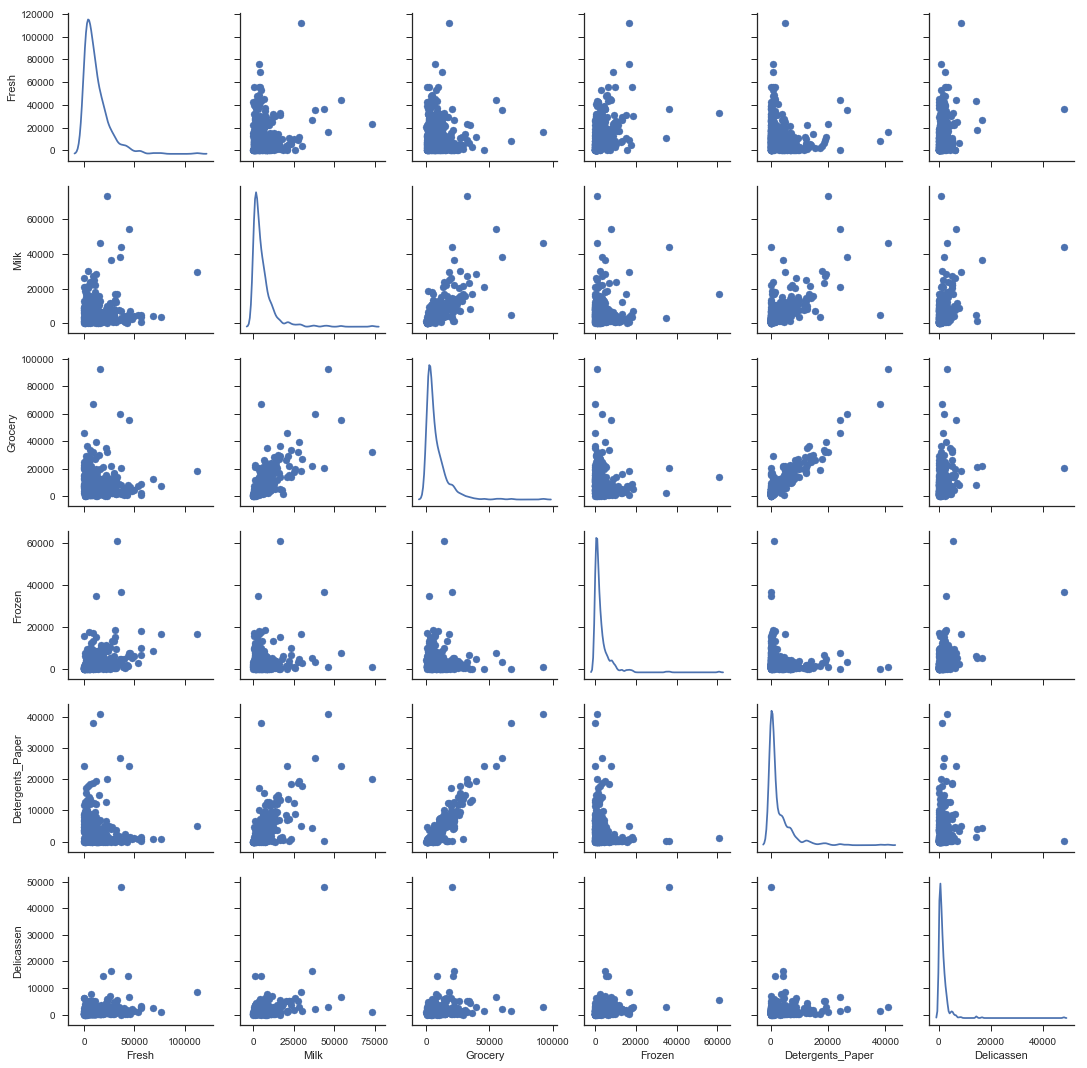

In [9]:
sns.set(style="ticks")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

In [10]:
# Scale the data
df = np.log(df)
samples = np.log(samples)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


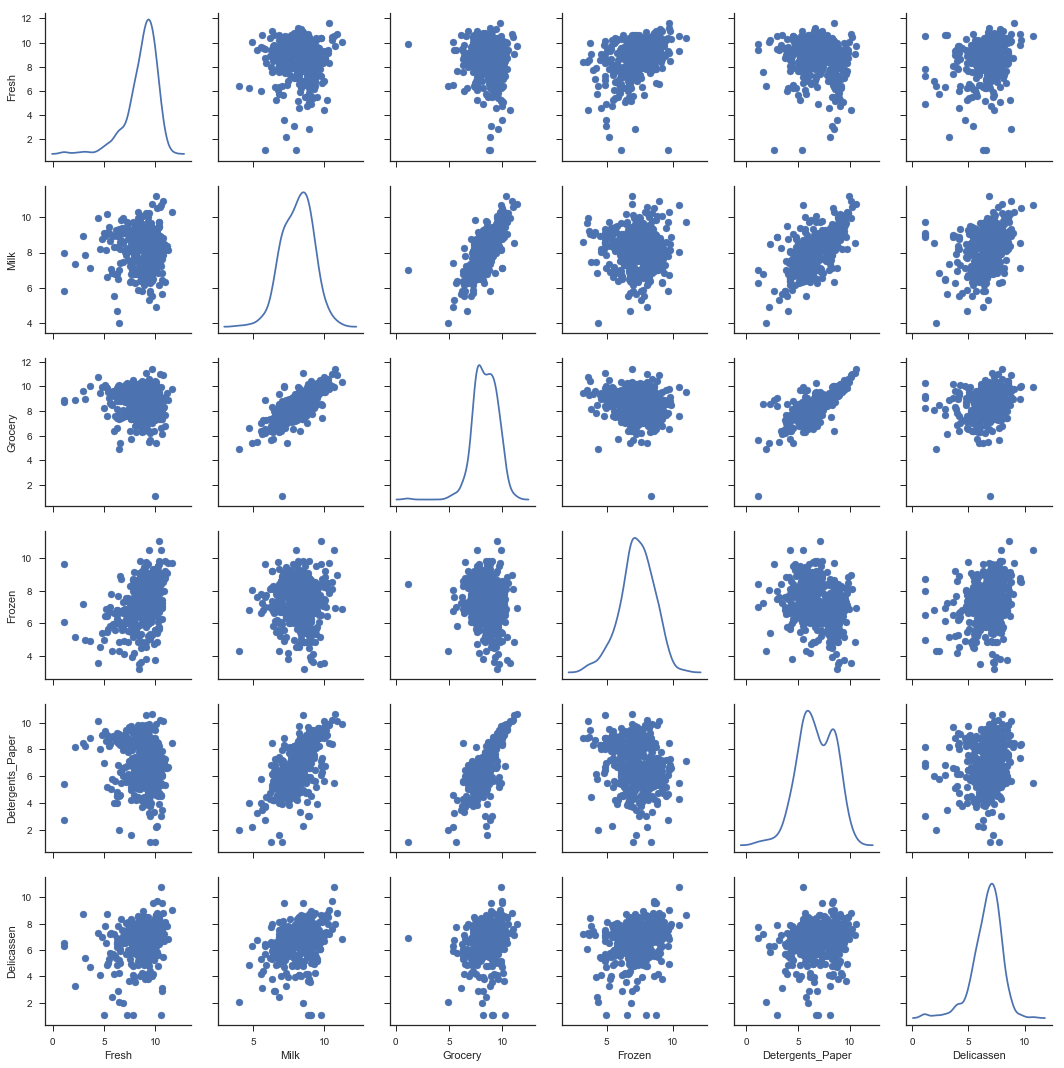

In [11]:
sns.set(style="ticks")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

In [12]:
# Outliers affect clusters, remove outliers.
outliers = []
for feature in df.columns:
    Q1 = np.percentile(df[feature],25)
    Q3 = np.percentile(df[feature],75)
    step = 1.5*(Q3-Q1)
    print('Outliers for {}'.format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    outliers.extend(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index)

Outliers for Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outliers for Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outliers for Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outliers for Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outliers for Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outliers for Delicassen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [13]:
outliers_dict = Counter(outliers)
multiple = list({key for key, value in outliers_dict.items() if value > 1})
print ("Outliers for more than one feature: ", np.sort(multiple))

Outliers for more than one feature:  [ 65  66  75 128 154]


In [14]:
df = df.drop(df.index[outliers]).reset_index(drop=True)
df_original = df_original.drop(df_original.index[outliers]).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


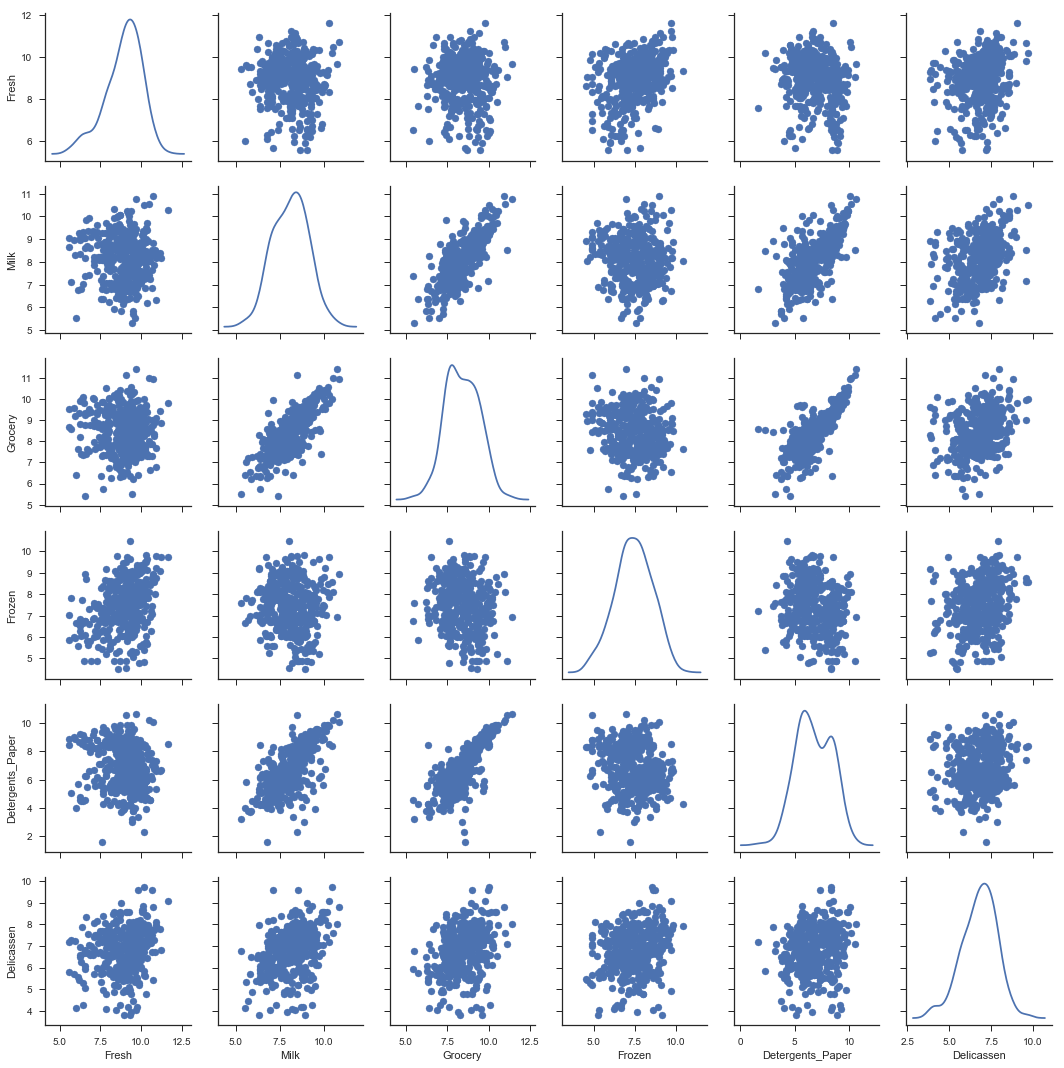

In [15]:
sns.set(style="ticks")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

### Principal component analysis and Dimensionality Reduction

In [16]:
pca = PCA(n_components=6).fit(df)
np.cumsum(pca.explained_variance_ratio_)

array([ 0.49930484,  0.7252529 ,  0.83013599,  0.92795361,  0.9767447 ,  1.        ])

In [17]:
pca = PCA(n_components=2).fit(df)
new_data = pca.transform(df)
samples = pca.transform(samples)

In [18]:
new_data = pd.DataFrame(new_data,columns = ['Dimension 1','Dimension 2'])
new_data.head()

,Dimension 1,Dimension 2
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314


In [19]:
clusters = list(range(2,11))

In [20]:
# Gaussian Mixture Model
for n in clusters:
    clusterer = GaussianMixture(n_components=n).fit(new_data)
    preds = clusterer.predict(new_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(samples)
    score = silhouette_score(new_data, preds, metric='euclidean')
    print ("For {} clusters, the mean silhouette coefficient is {}.".format(n, score))

For 2 clusters, the mean silhouette coefficient is 0.446753526944537.
For 3 clusters, the mean silhouette coefficient is 0.3611936250386726.
For 4 clusters, the mean silhouette coefficient is 0.298435230840589.
For 5 clusters, the mean silhouette coefficient is 0.31356874310508004.
For 6 clusters, the mean silhouette coefficient is 0.31695672748005377.
For 7 clusters, the mean silhouette coefficient is 0.33568268843052673.
For 8 clusters, the mean silhouette coefficient is 0.3026844111867451.
For 9 clusters, the mean silhouette coefficient is 0.30877618999240486.
For 10 clusters, the mean silhouette coefficient is 0.3295310632722507.


In [21]:
# K-Means Clustering Algorithm
for n in clusters:
    clusterer = KMeans(n_clusters=n).fit(new_data)
    preds = clusterer.predict(new_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(samples)
    score = silhouette_score(new_data, preds, metric='euclidean')
    print ("For {} clusters, the mean silhouette coefficient is {}.".format(n, score))

For 2 clusters, the mean silhouette coefficient is 0.447157742293467.
For 3 clusters, the mean silhouette coefficient is 0.363986479840174.
For 4 clusters, the mean silhouette coefficient is 0.3311509542845657.
For 5 clusters, the mean silhouette coefficient is 0.35133264224863914.
For 6 clusters, the mean silhouette coefficient is 0.3637123460943406.
For 7 clusters, the mean silhouette coefficient is 0.36621803804798775.
For 8 clusters, the mean silhouette coefficient is 0.3697989606179541.
For 9 clusters, the mean silhouette coefficient is 0.3667615587335842.
For 10 clusters, the mean silhouette coefficient is 0.34541497453680625.


### KMeans with clusters of 2 gets the best score

In [22]:
clusterer = KMeans(n_clusters=2).fit(new_data)
preds = clusterer.predict(new_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(samples)

In [23]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)

segments = ['Segment 0','Segment 1']
true_centers = pd.DataFrame(np.round(true_centers), columns = df.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


In [24]:
# Deviations from the median, mean is hugely affected by outliers
display(true_centers - df_original.median())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,343.0,-1673.5,-2124.0,470.5,-481.0,-226.5
Segment 1,-3684.0,4168.5,6959.0,-606.5,3656.0,138.5


In [25]:
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [26]:
samples_original

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
330,9790,1786,5109,3570,182,1043
309,918,20655,13567,1465,6846,806
320,1774,3696,2280,514,275,834


In [27]:
df_original['Segments'] = preds
df_original.head(20)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Segments
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
9,6006,11093,18881,1159,7425,2098,1
